<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/6_classical_machine_learning_with_scikit-learn/11_a_practical_intro_to_principal_components_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

<a name='0'></a>
#  Practical Intro to Principal Components Analysis for Dimension Reduction

## Intro to PCA

PCA standing for Principal Component Analysis is mostly used for reducing the dimension of datasets, and for such reason it's commonly known as dimensional reduction algorithm. 

Because of PCA's dimensional reduction ability, it can be used:

* To visualize high dimensional datasets, particuraly because visualizing such high level datasets is impractical. 

* Before a typical machine learning model training to merely increase the training speed, given that the training data is reduced or no longer contain redundant features. It is not guaranteed to speed up but in some cases, it can. 

* Select most useful features while getting the rid of useless information. But not always, sometime useful information will be lost too especially if the original data was already good and didn't contain noises. 

While the above can sound compelling (and they are), the features returned by PCA can be hard to interpret and it adds complexity that could turn out to be disadvantages than advantages.  

PCA is well implemented in [Scikit-Learn](https://scikit-learn.org/stable/modules/decomposition.html#latent-dirichlet-allocation-lda) and it has different versions such as Randomized PCA, Kernel PCA, and Incremental PCA(mostly for online learning). 

In many ML resources, you will find PCA in the category of unsupervised learning algorithms. Here is a simple reason: PCA reduces the dimension of datasets without instructions (labels in other word) of how that is going to be done other than specifying the number of principal components, just like specifying the number of clusters in KMeans clustering. 

While the maths and deep concepts behind PCA are beyond the scope this notebook, we will try to have a practical understanding of the above PCA's usecases. 

### Contents

* [1 - Imports](#1)

* [2 - PCA for Dimensional Reduction](#2)

    * [2.1 Loading the Data](#2-1)
    * [2.2 Applying PCA](#2-2)
    * [2.3 Visualizing the Principal Components](#2-3)
    * [2.4 Interpreting the Principal Components](#2-4)
    * [2.5 Explained Variance Ratio](#2-5)
    * [2.6 Choosing the Right Number of Components](#2-6)
    
    
* [3 - PCA for Digits Visualization](#3)
    * [3.1 Loading the Data](#3-1)
    * [3.2 Using PCA to reduce the Digits Dimensionality](#3-2)
    * [3.3 Visualizing the Digits](#3-3)

* [4- Final Notes](#4)

<a name='1'></a>
## 1 - Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

<a name='2'></a>

## 2 - PCA for Dimension Reduction

In this section, we are going to use PCA for reducing the dimension of a structured dataset. In the next example, we will use it for visualizing high dimensional datasets. 

We will use wine dataset. Check the data description down. 

<a name='2-1'></a>

### 2.1 Loading the data

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

# Features
X = wine.data 

# Target feature
y = wine.target

# Features names
feat_names = wine.feature_names

# Target name
target_names = wine.target_names

In [14]:
# Run below line for dataset description

#wine.DESCR

Now that we have loaded the data, let's inspect it a little bit to see what kind of the data we have. We can try to see the general information about it since the mere goal here is to reduce the dimension. 

In [15]:
X.shape

(178, 13)

In [16]:
y.shape

(178,)

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [18]:
feat_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [19]:
target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

The dataset has around 13 features(or dimensions). That's a lot of features.

Before applying PCA to the dataset, let's first scale the input data with `StandardScaler`. 

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

<a name='2-2'></a>

### 2.2 Applying PCA

Scikit-Learn is remarkably well designed. Just like how simple it is to use almost all algorithms implemented in Scikit-Learn, using PCA is no different. It's just `fit` and `transform`. 

In the process to reduce the dataset dimensionality, we have to specify the number of principal components. Think principal components as coordinates that we want to project the data in. 

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [22]:
X_reduced = pca.fit_transform(X_scaled)

In [23]:
# Shape of the reduced data

print('The shape of orginal dataset(without PCA):{}\nThe shape of reduced dataset due to PCA:{}'.format(X.shape, X_reduced.shape))

The shape of orginal dataset(without PCA):(178, 13)
The shape of reduced dataset due to PCA:(178, 2)


That was so fast. For now, we have reduced the dataset from 13 dimensions to 2 dimensions. 

<a name='2-3'></a>

### 2.3 Visualizing the Principal Components

Let's try to visualize the 2 principal components. We will also add the labels of the wine datasets or target_names.

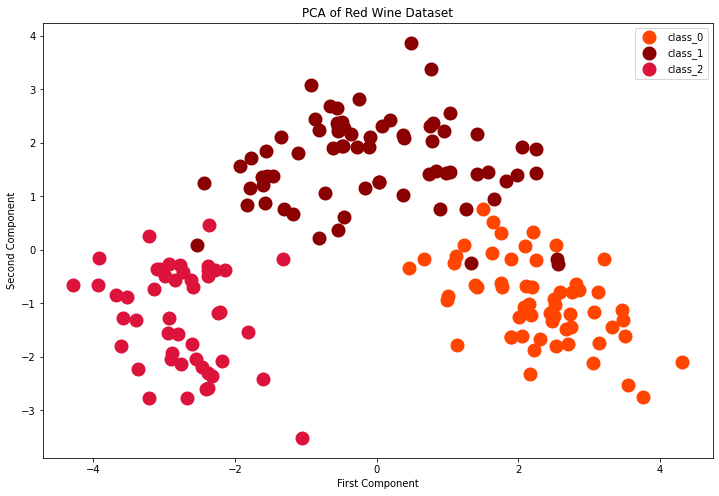

In [24]:
# wine_colors are assumptions

wine_colors = ['orangered', 'darkred', 'crimson']
num_classes = [0,1,2]

plt.figure(figsize=(12,8))

for color, num_class, target_name in zip(wine_colors, num_classes, target_names):
    
    plt.scatter(X_reduced[y==num_class,0], X_reduced[y==num_class,1], 
                c=color,linewidths=8,label=target_name, cmap='jet')
    
plt.title('PCA of Red Wine Dataset')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.legend()

For the scatter plot, above we plotted the two principal components and also used colors to differentiate the classes. 

Although we are able to visualize the entire dataset (by reducing the dimension) and we can see all 3 classes in one plot due to that it is reduced into 2 components, it's hard to interpret these components. 

Let's see the components

<a name='2-4'></a>

### 2.4 Interpreting the Principal Components

In [84]:
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02]])

In [85]:
# Shape of the components 

pca.components_.shape

(2, 13)

The first row of the above components is the First Principal Component and the second row is the Second Principal Component. The columns are the features. 

In order to understand these components, we can also visualize them using heatmap. 

<AxesSubplot:>

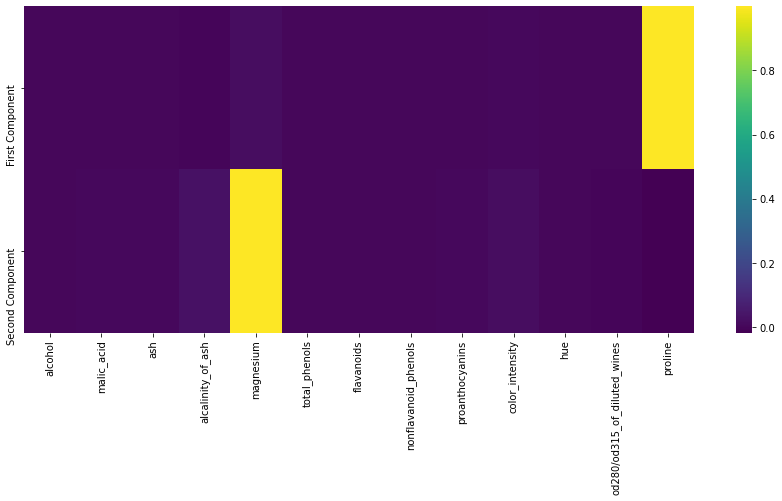

In [101]:
plt.figure(figsize=(15,6))

sns.heatmap(pca.components_, cmap='viridis',
            xticklabels=feat_names, 
            yticklabels=['First Component', 'Second Component'])


The above heatmap can be easy to interpret. It shows how much of a given feature is represented in the particular component. 

<a name='2-5'></a>

### 2.5 Explained Variance Ratio

Explained Variance Ratio shows the percentage of the dataset variance explained by each principal components.

`pca.explained_variance_` will show the whole variance amount. Whereas `pca.explained_variance_ratio_` will show the percentage variance. 

In [103]:
pca.explained_variance_

array([99201.78951748,   172.53526648])

In [104]:
pca.explained_variance_ratio_

array([0.99809123, 0.00173592])

The Explained Variance Ration in our case is `[0.99809123, 0.00173592]`. It means that 99.8% of the dataset variance lies on the first component, and the rest 0.17% lies on the second component.

If you look back to the heatmap above, on the y axis specifically, the above can make sense. 

<a name='2-6'></a>

### 2.6 Choosing Number of Components

One of the hardest thing using PCA might be to choose the number of principal components that will retain as much as information as possible. Most of the time, 2 or 3 components will be it, but you want to choose them based off the variance ratio. 

There is a better way to find them using `cumsum`.

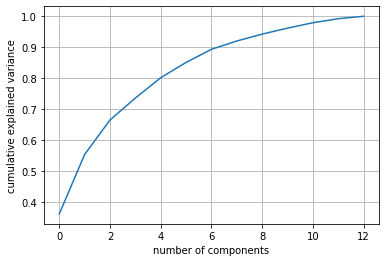

In [8]:
# Finding the right number of components by plotting no of components Vs explained variance ratio

from sklearn.decomposition import PCA

pca_2 = PCA()

pca_2.fit(X_scaled)

# Explained variance ratio
exp_var_ratio = pca_2.explained_variance_ratio_

# Cumulative sum of the variance ratios

cumsum = np.cumsum(exp_var_ratio)

# Plotting number of components Vs explained variance ratio

plt.plot(cumsum)

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

Another way to find them is to instead of passing the number of components in PCA object, pass the variance ration that you would like instead. 

In [10]:
# Finding the number of components from desired explained variance ratio

from sklearn.decomposition import PCA

pca_3 = PCA(n_components=0.96)

X_reduced = pca_3.fit_transform(X_scaled)

Let's now find the number of components using `pca_3.n_components_`.

In [11]:
pca_3.n_components_

10

And here is the explained variance ratio. It should be very close to `0.96`.

In [13]:
np.sum(pca_3.explained_variance_ratio_)

0.9616971684450644

<a name='3'></a>
## 3. PCA for Visualizing Hand Written Digits

Like we have been saying, PCA can be used to visualize the high dimensional dataset. 

Let us attempt to visualize the handwritten digits, a classical dataset you may already know if you're reading this notebook.

<a name='3-1'></a>
### 3.1 Loading the Data

In [26]:
from sklearn.datasets import load_digits

digits = load_digits()

In [27]:
digits_data = digits.data

digits_data .shape

(1797, 64)

In [29]:
# Scale the digits to see the differences when scaled and when not scaled 

# digits_scaled = scaler.fit_transform(digits_data)

Each digits has 64 dimensions, that is 8*8 pixels. We can use PCA to project those 64 dimensions into 2 dimensions or components. 

<a name='3-2'></a>
### 3.2 Using PCA to Reduce the Dimensionality

In [33]:
dig_pca = PCA(n_components=2)

digit_reduced = dig_pca.fit_transform(digits_data)

Let's see the shape of the reduced digits. 

In [123]:
# Shape of the reduced digits

print('The shape of orginal digits(without PCA):{}\nThe shape of reduced digits due to PCA:{}'.format(digits_data.shape, digit_reduced.shape))

The shape of orginal digits(without PCA):(1797, 64)
The shape of reduced digits due to PCA:(1797, 2)


<a name='3-3'></a>
### 3.3 Visualizing the Digits

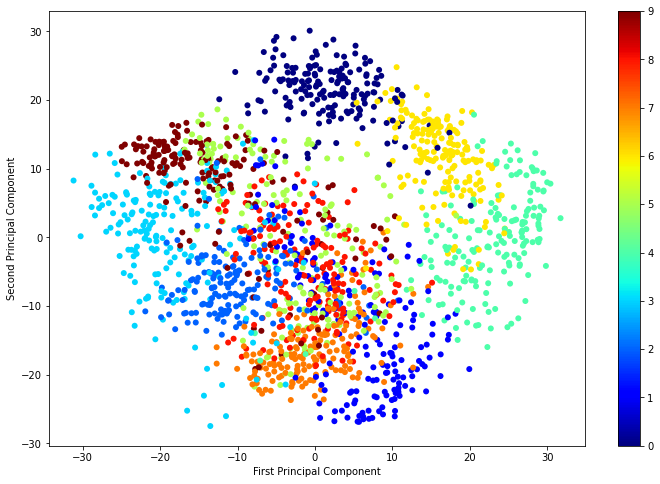

In [35]:
plt.figure(figsize=(12,8))

plt.scatter(digit_reduced[:,0],digit_reduced[:,1],
           c=digits.target,cmap=('jet'), edgecolor='none')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()

That is so fantastic. Imagine that we are able to visualize all 10 digits into one plot, just because we have reduced their dimensions from 64 to 2. 

<a name='4'></a>

## 4. Final Notes

This notebook was all about PCA. The main application of PCA is to reduce the dimension of the datasets, which in turn can motivate visualizations of reduced dataset. 

The version of the PCA used is Normal PCA but as we mentioned in the beginning, there are other version of PCA such as Randomized PCA, Kernel PCA and Incremental PCA. If you would like to learn more about those PCAs, check out the Scikit-Learn documentation of the section of [dimension reduction](https://scikit-learn.org/stable/modules/decomposition.html#decompositions). 


## [BACK TO TOP](#0)